In [1]:
from numpy.lib.function_base import copy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes
from sklearn import neighbors
import numpy as np

In [2]:
#leemos los datos indicando que no tenemos cabecera, tambien le quitamos la primera fila y la prmiera columna que son indices
aristas = pd.read_csv('LONDON_GANG.csv',header=None)
#comienza la matriz desde la fila1, columna1
aristas = aristas.iloc[1: ,1:] 
#mostramos las 10 primeras filas
print(aristas.head(10))

    1   2   3   4   5   6   7   8   9   10  ...  45  46  47  48  49  50  51  \
1    0   1   1   2   1   1   2   3   2   2  ...   1   1   0   0   0   0   1   
2    1   0   3   0   0   2   1   2   1   2  ...   0   0   0   0   0   0   0   
3    1   3   0   4   4   3   1   3   2   2  ...   0   0   0   0   0   0   0   
4    2   0   4   0   4   3   1   0   0   0  ...   0   0   0   0   1   0   0   
5    1   0   4   4   0   3   1   0   1   1  ...   0   0   1   0   1   0   0   
6    1   2   3   3   3   0   1   0   0   0  ...   0   0   0   0   1   0   0   
7    2   1   1   1   1   1   0   1   2   2  ...   0   1   1   1   0   0   0   
8    3   2   3   0   0   0   1   0   2   2  ...   0   0   0   0   0   0   0   
9    2   1   2   0   1   0   2   2   0   4  ...   0   1   0   0   0   0   0   
10   2   2   2   0   1   0   2   2   4   0  ...   0   0   0   0   0   0   0   

    52  53  54  
1    0   0   0  
2    0   0   0  
3    0   0   2  
4    0   0   0  
5    0   0   0  
6    0   0   0  
7    0   0 

In [3]:
#los atributos que en este caso son las caracteristicas de cada gangster, la linea de header es la fila 0, por defecto es 0
nodos = pd.read_csv('LONDON_GANG_ATTR.csv', header=0)
#la primera fila la cuenta como header
#la columna unnamed: 0 de la quitamos
nodos = nodos.iloc[1:, 1:]
print(nodos)


    Age  Birthplace  Residence  Arrests  Convictions  Prison  Music  Ranking
1    20           2          0       16            7       1      0        2
2    19           2          0       12            4       1      0        2
3    21           2          0        8            1       0      0        2
4    24           2          0       11            3       0      0        2
5    25           3          1       17           10       0      0        2
6    20           4          1        8            1       0      1        2
7    21           1          0       15            6       1      1        3
8    20           1          1        9            3       0      0        3
9    23           1          1       12            4       1      1        3
10   21           1          0       16            8       1      0        3
11   25           3          0        5            3       0      1        3
12   21           3          0       19            9       1      0        3

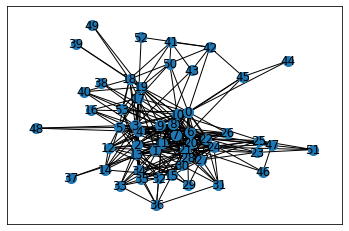

In [4]:
#vamos a crear el grafo 
grafo = nx.Graph(aristas.values)
#creamos el grafo dandole un tamaño 100 a los nodos, cada nodo es un gangster
nx.draw_networkx(grafo, node_size=100)


In [5]:
atributos = nodos
objetivo = nodos['Ranking']
print(atributos.iloc[:,:-1])

    Age  Birthplace  Residence  Arrests  Convictions  Prison  Music
1    20           2          0       16            7       1      0
2    19           2          0       12            4       1      0
3    21           2          0        8            1       0      0
4    24           2          0       11            3       0      0
5    25           3          1       17           10       0      0
6    20           4          1        8            1       0      1
7    21           1          0       15            6       1      1
8    20           1          1        9            3       0      0
9    23           1          1       12            4       1      1
10   21           1          0       16            8       1      0
11   25           3          0        5            3       0      1
12   21           3          0       19            9       1      0
13   19           3          0       23            9       0      1
14   21           3          0       12         

In [6]:
codificador_atributos = preprocessing.OrdinalEncoder()
codificador_atributos.fit(atributos.iloc[:,:-1])
#Con este comando miras los valores que puede haber cuando el atributo ya esta codificado
#print(codificador_atributos.categories_)

OrdinalEncoder()

In [7]:
atributos_codificados = codificador_atributos.transform(atributos.iloc[:,:-1])
#print(atributos_codificados)

In [8]:
codificador_objetivo = preprocessing.LabelEncoder()
objetivo_codificado = codificador_objetivo.fit_transform(objetivo)

In [9]:
print('Clases detectadas por el codificador para la variable objetivo')
print(codificador_objetivo.classes_)

Clases detectadas por el codificador para la variable objetivo
[2 3 4 5]


In [10]:
# Cantidad total de ejemplos
print('Frecuencia total de cada clase de aceptabilidad (porcentaje de cada valor objetivo en nuestro conjunto)')
print(pd.Series(objetivo).value_counts(normalize=True))

Frecuencia total de cada clase de aceptabilidad (porcentaje de cada valor objetivo en nuestro conjunto)
4    0.547170
3    0.301887
2    0.113208
5    0.037736
Name: Ranking, dtype: float64


In [11]:
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_codificados, objetivo_codificado,
        # Valor de la semilla aleatoria, para que el muestreo sea reproducible,
        # a pesar de ser aleatorio
        random_state=12345,
        # Tamaño del conjunto de prueba
        test_size=.20,
        # Estratificamos respecto a la distribución de valores en la variable objetivo
        stratify=objetivo_codificado)

In [12]:
print(objetivo_prueba)

[2 2 2 2 1 2 1 3 0 1 2]


In [13]:
print(atributos_prueba)

[[ 1.  2.  0.  3.  1.  0.  1.]
 [ 2.  3.  0.  0.  0.  0.  0.]
 [ 4.  2.  1. 11.  9.  1.  0.]
 [ 7.  0.  1. 17. 12.  1.  0.]
 [ 5.  2.  0. 18.  9.  1.  0.]
 [ 3.  1.  1.  8.  1.  0.  0.]
 [ 3.  1.  1.  6.  3.  1.  0.]
 [ 2.  2.  0.  1.  0.  0.  0.]
 [ 5.  1.  0.  8.  1.  0.  0.]
 [ 7.  0.  1. 11.  4.  1.  1.]
 [ 1.  2.  1.  2.  1.  1.  0.]]


In [14]:
print(atributos_entrenamiento)

[[ 5.  0.  0. 15.  8.  1.  0.]
 [ 1.  3.  0.  8.  2.  1.  0.]
 [ 1.  2.  0.  6.  1.  0.  0.]
 [ 7.  0.  0.  4.  5.  0.  1.]
 [ 0.  3.  0.  0.  0.  0.  0.]
 [ 2.  2.  0.  7.  4.  0.  0.]
 [ 3.  1.  0. 11.  4.  1.  0.]
 [ 2.  2.  1. 14.  6.  0.  0.]
 [ 8.  1.  0. 10.  3.  0.  0.]
 [ 9.  2.  1. 16. 10.  0.  0.]
 [ 4.  1.  1. 20.  9.  1.  0.]
 [ 9.  1.  0. 21. 13.  1.  0.]
 [ 6.  2.  1.  2.  0.  1.  0.]
 [ 2.  2.  1.  7.  1.  0.  0.]
 [ 4.  1.  0. 15.  7.  1.  0.]
 [ 2.  2.  1.  7.  3.  0.  0.]
 [ 5.  0.  0. 14.  6.  1.  1.]
 [ 3.  2.  0. 21. 11.  1.  0.]
 [ 1.  2.  0.  4.  1.  0.  0.]
 [ 4.  3.  1.  8.  1.  0.  1.]
 [ 4.  0.  1.  9.  3.  0.  0.]
 [ 9.  2.  0.  5.  3.  0.  1.]
 [ 3.  1.  0.  3.  0.  0.  0.]
 [ 1.  0.  0. 11.  4.  0.  0.]
 [ 3.  2.  0. 13.  7.  1.  0.]
 [ 1.  2.  1.  7.  2.  1.  0.]
 [ 5.  2.  0. 11.  9.  1.  0.]
 [10.  3.  0. 19. 11.  1.  0.]
 [ 6.  2.  1.  4.  3.  0.  0.]
 [ 4.  0.  0.  5.  2.  0.  1.]
 [ 4.  1.  0.  6.  2.  0.  0.]
 [ 2.  2.  0.  5.  2.  1.  0.]
 [ 0.  0

In [15]:
print(objetivo_entrenamiento)

[1 2 2 2 2 2 0 2 0 0 1 1 1 2 0 2 1 2 2 0 1 1 2 2 2 2 2 2 2 1 2 2 2 3 1 1 2
 2 2 1 1 1]


In [16]:
print('Cantidad de ejemplos de pruebas requeridos:', nodos.shape[0] * .20)
print('Filas del array de atributos de prueba:', atributos_prueba.shape[0])
print('Longitud del vector de objetivos de prueba:', len(objetivo_prueba))
print('Proporción de clases en el vector de objetivos de prueba:')
print(pd.Series(
        codificador_objetivo.inverse_transform(objetivo_prueba)
      ).value_counts(normalize=True))

Cantidad de ejemplos de pruebas requeridos: 10.600000000000001
Filas del array de atributos de prueba: 11
Longitud del vector de objetivos de prueba: 11
Proporción de clases en el vector de objetivos de prueba:
4    0.545455
3    0.272727
5    0.090909
2    0.090909
dtype: float64


In [17]:
print('Cantidad de ejemplos de entrenamiento requeridos:', nodos.shape[0] * .80)
print('Filas del array de atributos de entrenamiento:', atributos_entrenamiento.shape[0])
print('Longitud del vector de objetivos de entrenamiento:', len(objetivo_entrenamiento))
print('Proporción de clases en el vector de objetivos de entrenamiento:')
print(pd.Series(# Comprobamos que el 
        codificador_objetivo.inverse_transform(objetivo_entrenamiento)
      ).value_counts(normalize=True))

Cantidad de ejemplos de entrenamiento requeridos: 42.400000000000006
Filas del array de atributos de entrenamiento: 42
Longitud del vector de objetivos de entrenamiento: 42
Proporción de clases en el vector de objetivos de entrenamiento:
4    0.547619
3    0.309524
2    0.119048
5    0.023810
dtype: float64


Los modelos los he sacado de la página oficial de sklearn:
    https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

# RANDOM FOREST

In [18]:
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 random_state=15,
                                 n_jobs=20)
#entrenamos nuestro modelo
forest.fit(atributos_entrenamiento, objetivo_entrenamiento)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=20,
                       random_state=15)

In [19]:
objetivo_predicho=forest.predict(atributos_prueba)
print(codificador_objetivo.inverse_transform(objetivo_predicho))

[4 4 3 3 4 3 4 4 4 3 4]


In [20]:
predicciones = forest.predict(codificador_atributos.transform(nuevos_ejemplos))
print("La predicción de Ranking para el primer Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[0]))
print("La predicción de Ranking para el segundo Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[1])+"\n")
forestScore = forest.score(atributos_prueba, objetivo_prueba)
print("Accuracy:",forest.score(atributos_prueba, objetivo_prueba))


NameError: name 'nuevos_ejemplos' is not defined

# ARBOLES DE DECISIÓN

In [ ]:
clasif_CART = tree.DecisionTreeClassifier(
    max_depth=4,  # máxima profundidad del árbol
    random_state=55555  # semilla aleatoria
)
clasif_CART.fit(atributos_entrenamiento, objetivo_entrenamiento)

In [ ]:
pyplot.figure(figsize=(100, 30))  # Anchura y altura del gráfico
árbol = tree.plot_tree(clasif_CART,
                       feature_names=codificador_atributos.feature_names_in_,
                       class_names=str(codificador_objetivo.classes_))

In [ ]:
nuevos_ejemplos = pd.DataFrame([[17, 3, 1, 1, 9, 0, 1],
                                    [20, 1, 0, 5, 8, 1, 0]],
                                   columns=codificador_atributos.feature_names_in_)
nuevos_ejemplos

In [ ]:
predicciones = clasif_CART.predict(codificador_atributos.transform(nuevos_ejemplos))
print("La predicción de Ranking para el primer Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[0]))
print("La predicción de Ranking para el segundo Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[1]))

In [ ]:
cartScore =clasif_CART.score(atributos_prueba, objetivo_prueba)
clasif_CART.score(atributos_prueba, objetivo_prueba)

# NAIVE BAYES

In [ ]:
clasif_NB = naive_bayes.CategoricalNB(alpha=1.0)  # alpha es el parámetro de suavizado
clasif_NB.fit(atributos_entrenamiento, objetivo_entrenamiento)

In [ ]:
for clase, cantidad_ejemplos_clase, log_probabilidad_clase in zip(
    codificador_objetivo.classes_, clasif_NB.class_count_, clasif_NB.class_log_prior_):
        print(f'Cantidad de ejemplos para la clase {clase}: {cantidad_ejemplos_clase}')
        print(f'Logaritmo de la probabilidad aprendida para la clase {clase}: {log_probabilidad_clase}')


In [ ]:
for i, atributo in enumerate(codificador_atributos.feature_names_in_):
    print(f'Cantidad de ejemplos para el atributo {atributo}:')
    print(pd.DataFrame(clasif_NB.category_count_[i],
                          columns=codificador_atributos.categories_[i],
                          index=codificador_objetivo.classes_))
    print(f'Logaritmos de las probabilidades aprendidas para el atributo {atributo}:')
    print(pd.DataFrame(clasif_NB.feature_log_prob_[i],
                          columns=codificador_atributos.categories_[i],
                          index=codificador_objetivo.classes_))
    print()

In [ ]:
predicciones = clasif_NB.predict(codificador_atributos.transform(nuevos_ejemplos))
print("La predicción de Ranking para el primer Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[0]))
print("La predicción de Ranking para el segundo Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[1]))

In [ ]:
nbScore = clasif_NB.score(atributos_prueba, objetivo_prueba)
clasif_NB.score(atributos_prueba, objetivo_prueba)

# KNN

In [ ]:
clasif_kNN = neighbors.KNeighborsClassifier(
    n_neighbors=5,  # Número de vecinos a considerar
    metric='hamming'  # Distancia de Hamming como métrica de cercanía:
                      # fracción de atributos con valores distintos
)
clasif_kNN.fit(atributos_entrenamiento, objetivo_entrenamiento)


predicciones = clasif_kNN.predict(codificador_atributos.transform(nuevos_ejemplos))
print("La predicción de Ranking para el primer Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[0]))
print("La predicción de Ranking para el segundo Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[1]) + "\n")


knnScore = clasif_kNN.score(atributos_prueba, objetivo_prueba)
print(knnScore)

# PROCEDEMOS A METERLE LAS CENTRALIDADES NUEVAS

In [ ]:
#leemos los datos indicando que no tenemos cabecera, tambien le quitamos la primera fila y la prmiera columna que son indices
aristas = pd.read_csv('LONDON_GANG.csv',header=None)
#comienza la matriz desde la fila1, columna1
aristas = aristas.iloc[1: ,1:] 
#mostramos las 10 primeras filas
print(aristas.head(10))

In [ ]:
#los atributos que en este caso son las caracteristicas de cada gangster, la linea de header es la fila 0, por defecto es 0
nodos = pd.read_csv('LONDON_GANG_ATTR.csv', header=0)
#la primera fila la cuenta como header
#la columna unnamed: 0 de la quitamos
nodos = nodos.iloc[1:, 1:]

las centralidades las he sacado de:
    https://github.com/networkx/networkx/tree/main/networkx/algorithms/centrality

In [ ]:
betweeness_dicc = nx.betweenness_centrality(grafo)
close_dicc = nx.closeness_centrality(grafo)
degree_dicc = nx.degree_centrality(grafo)
clusters_dicc = nx.clustering(grafo)


In [ ]:
centralidad_intermediación = list(betweeness_dicc.values())[1:]
centralidad_de_proximidad = list(close_dicc.values())[1:]
centralidad_de_grado = list(degree_dicc.values())[1:]
clusters = list(clusters_dicc.values())[1:]

In [ ]:
nodos.insert(0,"centralidad_intermediación", centralidad_intermediación)
nodos.insert(1,"centralidad_de_proximidad", centralidad_de_proximidad)
nodos.insert(2,"centralidad_de_grado", centralidad_de_grado)
nodos.insert(3,"clusters", clusters)


podemos ver como se han introducido

In [ ]:
nodos.head(1)

In [ ]:
atributos = nodos
objetivo = nodos['Ranking']
atributos

In [ ]:
codificador_atributos = preprocessing.OrdinalEncoder()
codificador_atributos.fit(atributos.iloc[:,:-1])
#Con este comando miras los valores que puede haber cuando el atributo ya esta codificado
#print(codificador_atributos.categories_)

In [ ]:
atributos_codificados = codificador_atributos.transform(atributos.iloc[:,:-1])
#print(atributos_codificados)

In [ ]:
codificador_objetivo = preprocessing.LabelEncoder()
objetivo_codificado = codificador_objetivo.fit_transform(objetivo)

In [ ]:
(atributos_entrenamiento_mejorados, atributos_prueba_mejorados,
 objetivo_entrenamiento_mejorados, objetivo_prueba_mejorados) = model_selection.train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_codificados, objetivo_codificado,
        # Valor de la semilla aleatoria, para que el muestreo sea reproducible,
        # a pesar de ser aleatorio
        random_state=12345,
        # Tamaño del conjunto de prueba
        test_size=.20,
        # Estratificamos respecto a la distribución de valores en la variable objetivo
        stratify=objetivo_codificado)

In [ ]:
print(objetivo_prueba_mejorados)

In [ ]:
print(atributos_prueba_mejorados)


In [ ]:
print(atributos_entrenamiento_mejorados)

In [ ]:

 print(objetivo_entrenamiento_mejorados)

In [ ]:
print('Cantidad de ejemplos de pruebas requeridos:', nodos.shape[0] * .20)
print('Filas del array de atributos de prueba:', atributos_prueba_mejorados.shape[0])
print('Longitud del vector de objetivos de prueba:', len(objetivo_prueba_mejorados))
print('Proporción de clases en el vector de objetivos de prueba:')
print(pd.Series(
        codificador_objetivo.inverse_transform(objetivo_prueba_mejorados)
      ).value_counts(normalize=True))

In [ ]:
print('Cantidad de ejemplos de entrenamiento requeridos:', nodos.shape[0] * .80)
print('Filas del array de atributos de entrenamiento:', atributos_entrenamiento_mejorados.shape[0])
print('Longitud del vector de objetivos de entrenamiento:', len(objetivo_entrenamiento_mejorados))
print('Proporción de clases en el vector de objetivos de entrenamiento:')
print(pd.Series(# Comprobamos que el 
        codificador_objetivo.inverse_transform(objetivo_entrenamiento_mejorados)
      ).value_counts(normalize=True))

Los modelos los he sacado de la página oficial de sklearn:
    https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

# RANDOM FOREST

In [ ]:
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 random_state=15,
                                 n_jobs=20)
#entrenamos nuestro modelo
forest.fit(atributos_entrenamiento_mejorados, objetivo_entrenamiento_mejorados)

In [ ]:
objetivo_predicho=forest.predict(atributos_prueba_mejorados)
print(codificador_objetivo.inverse_transform(objetivo_predicho))

In [ ]:
### predicciones = forest.predict(codificador_atributos.transform(nuevos_ejemplos))
###print("La predicción de Ranking para el primer Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[0]))
#print("La predicción de Ranking para el segundo Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[1])+"\n")

print("Accuracy:",forest.score(atributos_prueba_mejorados, objetivo_prueba_mejorados))


# ARBOLES DE DECISIÓN

In [ ]:
clasif_CART = tree.DecisionTreeClassifier(
    max_depth=4,  # máxima profundidad del árbol
    random_state=55555  # semilla aleatoria
)
clasif_CART.fit(atributos_entrenamiento_mejorados, objetivo_entrenamiento_mejorados)

In [ ]:
pyplot.figure(figsize=(100, 30))  # Anchura y altura del gráfico
árbol = tree.plot_tree(clasif_CART,
                       feature_names=codificador_atributos.feature_names_in_,
                       class_names=str(codificador_objetivo.classes_))

In [ ]:
#nuevos_ejemplos = pd.DataFrame([[17, 3, 1, 1, 9, 0, 1],
                                    #[20, 1, 0, 5, 8, 1, 0]],
                                  # columns=codificador_atributos.feature_names_in_)
#nuevos_ejemplos

In [ ]:
#predicciones = clasif_CART.predict(codificador_atributos.transform(nuevos_ejemplos))
#print("La predicción de Ranking para el primer Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[0]))
#print("La predicción de Ranking para el segundo Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[1]))

In [ ]:
clasif_CART.score(atributos_prueba_mejorados, objetivo_prueba_mejorados)

# NEIVE BAYES

In [ ]:
clasif_NB = naive_bayes.CategoricalNB(alpha=1.0)  # alpha es el parámetro de suavizado
clasif_NB.fit(atributos_entrenamiento_mejorados, objetivo_entrenamiento_mejorados)

In [ ]:
for clase, cantidad_ejemplos_clase, log_probabilidad_clase in zip(
    codificador_objetivo.classes_, clasif_NB.class_count_, clasif_NB.class_log_prior_):
        print(f'Cantidad de ejemplos para la clase {clase}: {cantidad_ejemplos_clase}')
        print(f'Logaritmo de la probabilidad aprendida para la clase {clase}: {log_probabilidad_clase}')


In [ ]:
for i, atributo in enumerate(codificador_atributos.feature_names_in_):
    print(f'Cantidad de ejemplos para el atributo {atributo}:')
    print(pd.DataFrame(clasif_NB.category_count_[i],
                          columns=codificador_atributos.categories_[i],
                          index=codificador_objetivo.classes_))
    print(f'Logaritmos de las probabilidades aprendidas para el atributo {atributo}:')
    print(pd.DataFrame(clasif_NB.feature_log_prob_[i],
                          columns=codificador_atributos.categories_[i],
                          index=codificador_objetivo.classes_))
    print()

In [ ]:
#predicciones = clasif_NB.predict(codificador_atributos.transform(nuevos_ejemplos))
#print("La predicción de Ranking para el primer Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[0]))
#print("La predicción de Ranking para el segundo Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[1]))

In [ ]:
clasif_NB.score(atributos_prueba_mejorados, objetivo_prueba_mejorados)

# KNN

In [ ]:
clasif_kNN = neighbors.KNeighborsClassifier(
    n_neighbors=5,  # Número de vecinos a considerar
    metric='hamming'  # Distancia de Hamming como métrica de cercanía:
                      # fracción de atributos con valores distintos
)
clasif_kNN.fit(atributos_entrenamiento_mejorados, objetivo_entrenamiento_mejorados)


#predicciones = clasif_kNN.predict(codificador_atributos.transform(nuevos_ejemplos))
#print("La predicción de Ranking para el primer Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[0]))
#print("La predicción de Ranking para el segundo Gangster: " + str(codificador_objetivo.inverse_transform(predicciones)[1]) + "\n")


KNN_relacional = clasif_kNN.score(atributos_prueba_mejorados, objetivo_prueba_mejorados)
print(KNN_relacional)

In [ ]:
serie_1 = [forestScore, cartScore, nbScore, knnScore]
serie_2 = [forest.score(atributos_prueba_mejorados, objetivo_prueba_mejorados), clasif_CART.score(atributos_prueba_mejorados, objetivo_prueba_mejorados),clasif_NB.score(atributos_prueba_mejorados, objetivo_prueba_mejorados), clasif_kNN.score(atributos_prueba_mejorados,objetivo_prueba_mejorados)]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.4
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='Acierto sin metricas relacionales')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Acierto con metricas relacionales')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('Random Forest', 'Árbol de decisión',"NeiveBayes", 'kNN'))

plt.ylabel('Acierto')
plt.xlabel('Método')
plt.title('Comparativa de precisión')
 
plt.show()

In [ ]:
serie_1 = [forestScore]
serie_2 = [forest.score(atributos_prueba_mejorados, objetivo_prueba_mejorados),]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.4
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='Acierto sin metricas relacionales')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Acierto con metricas relacionales')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('Random Forest', 'Árbol de decisión',"NeiveBayes", 'kNN'))

plt.ylabel('Acierto')
plt.xlabel('Método')
plt.title('Comparativa de precisión')
 
plt.show()

In [ ]:
manolete pollete